In [19]:
import pandas as pd
pd.set_option('max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline

数据名称还是要加上 .zip 否则找不到

In [3]:
# 读取的文件路径 可以使用相对路径或绝对路径
train = pd.read_csv('./train_set.csv.zip', sep='\t')

In [9]:
# 为什么内存占用这么小？？
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
label    200000 non-null int64
text     200000 non-null object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [13]:
train.sample(3)

,label,text
38208,13,3370 3700 1519 3864 340 5792 5165 3070 1866 50...
10291,0,4958 5520 3440 2402 2109 6920 2465 6962 5393 1...
153381,2,3370 3700 1859 3613 2109 3800 3479 5289 2595 3...


#### 赛题中的文字进行了脱敏处理，均用字符代替，所以无法进行中文的分词处理

In [14]:
# 为防止内存过大，只读取100个数据进行分析
test = pd.read_csv('./test_a.csv.zip', sep='\t', nrows=100)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
text    100 non-null object
dtypes: object(1)
memory usage: 928.0+ bytes


In [16]:
test.head()

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


虽然对于非结构数据并不需要做很多的数据分析，但通过数据分析还是可以找出一些规律的

### 读取所有训练集数据，通过数据分析希望得出以下结论：
- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？

#### 句子长度分析
在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度

In [17]:
# 间隔这里使用的是空格 而不是制表符
# apply函数作用于series的每一个元素
train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))
print(train['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


将句子长度绘制了直方图，可见大部分句子的长度都几种在2000以内

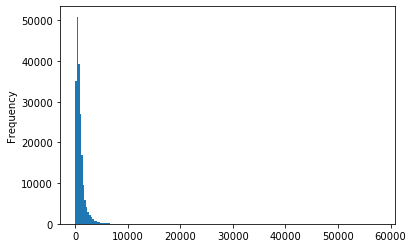

In [27]:
# 不加bins的话，会挤在一起
train['text_len'].plot(kind='hist', bins=200, figsize=(6, 4), fontsize=10)

Text(0.5, 1.0, 'Histogram of char count')

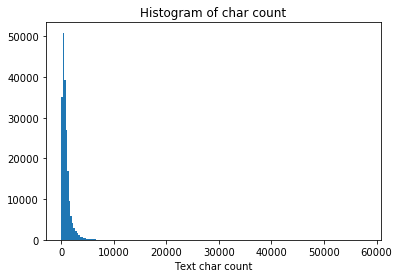

In [36]:
# 会返回一个参数
_ = plt.hist(train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

#### 新闻类别分布
对数据集的类别进行分布统计，具体统计每类新闻的样本个数

In [34]:
train.label.value_counts()

0     38918
1     36945
2     31425
3     22133
4     15016
5     12232
6      9985
7      8841
8      7847
9      5878
10     4920
11     3131
12     1821
13      908
Name: label, dtype: int64

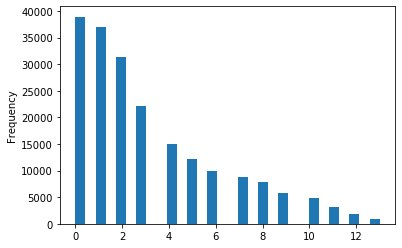

In [33]:
train['label'].plot(kind='hist', bins=30)

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}  
从统计结果可以看出，赛题的数据集**类别分布存在较为不均匀**的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻

#### 字符分布统计¶
接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数

In [49]:
# 列表有3个元素，每个元素都是一个字符串
list(train[:3].text)

['2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 4811 1292 2109 6905 5520 7058 6045 3634 6591 3530 6508 2465 7044 1519 3659 2073 3750 3731 4109 3792 6831 2614 3370 4269 3370 486 5770 4109 4125 3750 5445 2466 6831 6758 3743 3630 1726 2313 5906 826 4516 657 900 1871 7044 3750 2967 3731 1757 1939 648 2828 4704 7039 3706 3750 965 2490 7399 3743 2145 2407 7451 3775 6017 5998 1641 299 4704 2621 7029 3056 6333 433 648 1667 1099 900 2289 1099 648 5780 220 7044 1279 7426 4269 3750 2967 6758 6631 3099 2205 7305 2620 5977 3750 3329 1793 6666 2042 3193 4149 1519 7039 3706 2446 5399 648 4124 2058 3912 248 3193 2252 5649 2212 4939 7239 3310 4525 2400 900 5770 4109 4125 7044 4921 265 1397 4699 1699 669 6407 3750 1271 1271 4741 669 4659 3870 4030 4167 5338 25 3466 6909 4417 1859 3750 1465 7194 648 3938 1571 848 6986 827 2124 3750 1991 7444 7037 2729 908 6308 3750 1889 6810 4190 591 5598 2289 2109 6831 6407 2400 5410 517 900 25 3731 4109 3792 4128 1679 4811

In [47]:
# 生成单个字符串
lines = ' '.join(list(train[:3].text))
lines

'2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 4811 1292 2109 6905 5520 7058 6045 3634 6591 3530 6508 2465 7044 1519 3659 2073 3750 3731 4109 3792 6831 2614 3370 4269 3370 486 5770 4109 4125 3750 5445 2466 6831 6758 3743 3630 1726 2313 5906 826 4516 657 900 1871 7044 3750 2967 3731 1757 1939 648 2828 4704 7039 3706 3750 965 2490 7399 3743 2145 2407 7451 3775 6017 5998 1641 299 4704 2621 7029 3056 6333 433 648 1667 1099 900 2289 1099 648 5780 220 7044 1279 7426 4269 3750 2967 6758 6631 3099 2205 7305 2620 5977 3750 3329 1793 6666 2042 3193 4149 1519 7039 3706 2446 5399 648 4124 2058 3912 248 3193 2252 5649 2212 4939 7239 3310 4525 2400 900 5770 4109 4125 7044 4921 265 1397 4699 1699 669 6407 3750 1271 1271 4741 669 4659 3870 4030 4167 5338 25 3466 6909 4417 1859 3750 1465 7194 648 3938 1571 848 6986 827 2124 3750 1991 7444 7037 2729 908 6308 3750 1889 6810 4190 591 5598 2289 2109 6831 6407 2400 5410 517 900 25 3731 4109 3792 4128 1679 4811 

In [48]:
# 单个字符串生成列表，collections进行统计
lines.split(' ')

['2967',
 '6758',
 '339',
 '2021',
 '1854',
 '3731',
 '4109',
 '3792',
 '4149',
 '1519',
 '2058',
 '3912',
 '2465',
 '2410',
 '1219',
 '6654',
 '7539',
 '264',
 '2456',
 '4811',
 '1292',
 '2109',
 '6905',
 '5520',
 '7058',
 '6045',
 '3634',
 '6591',
 '3530',
 '6508',
 '2465',
 '7044',
 '1519',
 '3659',
 '2073',
 '3750',
 '3731',
 '4109',
 '3792',
 '6831',
 '2614',
 '3370',
 '4269',
 '3370',
 '486',
 '5770',
 '4109',
 '4125',
 '3750',
 '5445',
 '2466',
 '6831',
 '6758',
 '3743',
 '3630',
 '1726',
 '2313',
 '5906',
 '826',
 '4516',
 '657',
 '900',
 '1871',
 '7044',
 '3750',
 '2967',
 '3731',
 '1757',
 '1939',
 '648',
 '2828',
 '4704',
 '7039',
 '3706',
 '3750',
 '965',
 '2490',
 '7399',
 '3743',
 '2145',
 '2407',
 '7451',
 '3775',
 '6017',
 '5998',
 '1641',
 '299',
 '4704',
 '2621',
 '7029',
 '3056',
 '6333',
 '433',
 '648',
 '1667',
 '1099',
 '900',
 '2289',
 '1099',
 '648',
 '5780',
 '220',
 '7044',
 '1279',
 '7426',
 '4269',
 '3750',
 '2967',
 '6758',
 '6631',
 '3099',
 '2205',
 '7305

只统计前5万个字符，否则容易 MemoryError  
10万个勉强可以

In [52]:
from collections import Counter

# 将所有句子的字符拼接成一个句子，中间是空格间隔（统一）
all_lines = ' '.join(list(train['text'][:50000]))

# 对各种字符进行计数
word_count = Counter(all_lines.split(' '))  
# 排序函数sorted作用于字典上
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse=True)

In [53]:
# 总共多少种字符
print(len(word_count))
# 哪种字符数量最多
print(word_count[0])
# 哪种字符数量最少
print(word_count[-1])

6180
('3750', 1863795)
('1766', 1)


**还可以根据字在每个句子的出现情况，反推出标点符号（去重是关键）**  
下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的**覆盖率**接近99%，很有可能是标点符号

In [55]:
# 可以20万个一起统计
from collections import Counter

# 每个text进行字符去重，join 作用于 list
train['text_unique'] = train['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train['text_unique']))
# 字符去重后，进行统计
word_count1 = Counter(all_lines.split(" "))
word_count1 = sorted(word_count1.items(), key=lambda d:int(d[1]), reverse=True)

In [56]:
# 前两个的出现率都接近99%，大概率是标点符号
print(word_count1[0])
print(word_count1[0][1] / 200000)
#
print(word_count1[1])
print(word_count1[1][1] / 200000)
#
print(word_count1[2])
print(word_count1[2][1] / 200000)

('3750', 197997)
0.989985
('900', 197653)
0.988265
('648', 191975)
0.959875


In [58]:
word_count1[:20]

[('3750', 197997),
 ('900', 197653),
 ('648', 191975),
 ('2465', 177310),
 ('6122', 176543),
 ('7399', 176249),
 ('4811', 169371),
 ('4464', 167161),
 ('1699', 164856),
 ('3659', 163171),
 ('2400', 163070),
 ('299', 163068),
 ('3370', 162335),
 ('2109', 159373),
 ('4939', 158713),
 ('5598', 156009),
 ('669', 155729),
 ('5445', 154533),
 ('4853', 153050),
 ('2376', 149517)]

### 数据分析的结论：
- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

#### 通过数据分析，还可以得出以下结论：
- 每个新闻平均字符个数较多，可能需要截断（不然其他的**词向量过于稀疏**？）；
- 由于类别不均衡，会严重影响模型的精度；